#Techniques de visualisation des séries temporelles financières

##1. Téléchargement et visualisation des données boursières de Microsoft en 2020

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = yf.download("MSFT",
                 start="2020-01-01",
                 end="2020-12-31",
                 auto_adjust=False,
                 progress=False)

df["simple_rtn"] = df["Adj Close"].pct_change()
df = df.dropna()


<Axes: title={'center': 'Prix ajusté des actions Microsoft en 2020'}, xlabel='Date'>

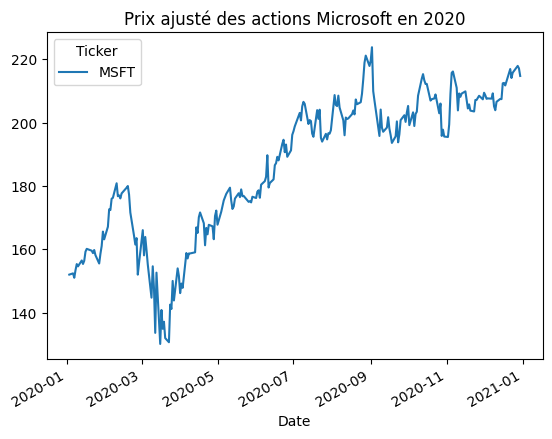

In [ ]:
df["Adj Close"].plot(title="Prix ajusté des actions Microsoft en 2020")


Le graphique montre l'évolution du prix ajusté des actions de Microsoft en 2020. Après une chute notable en mars 2020, liée à la pandémie de COVID-19, le cours a rapidement rebondi grâce à la forte demande pour les technologies et les services cloud. La tendance générale est une augmentation régulière, atteignant un pic en septembre, suivie d'une stabilisation autour de 220 USD en fin d'année, reflétant la résilience de l'entreprise dans un contexte économique difficile.

##2. Affichage des prix ajustés et des rendements simples sur un seul graphique

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

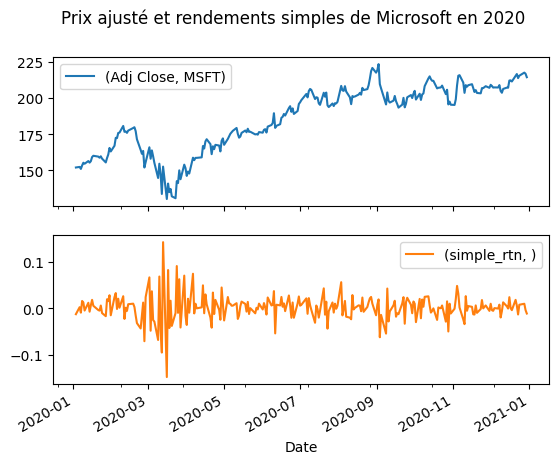

In [ ]:
(
    df[["Adj Close", "simple_rtn"]]
    .plot(subplots=True,
          sharex=True,
          title="Prix ajusté et rendements simples de Microsoft en 2020")
)

Le graphique montre le prix ajusté des actions de Microsoft en 2020 (en haut) et ses rendements simples quotidiens (en bas). Le prix suit une tendance haussière globale, malgré une chute marquée en mars liée à la pandémie. Les rendements simples montrent une forte volatilité au début de l'année, particulièrement lors de la crise de mars, avant de se stabiliser avec des variations quotidiennes plus faibles vers la fin de l'année. Cette analyse reflète une reprise solide des actions après un choc initial.

##3. Utilisation de l'interface orientée objet de Matplotlib


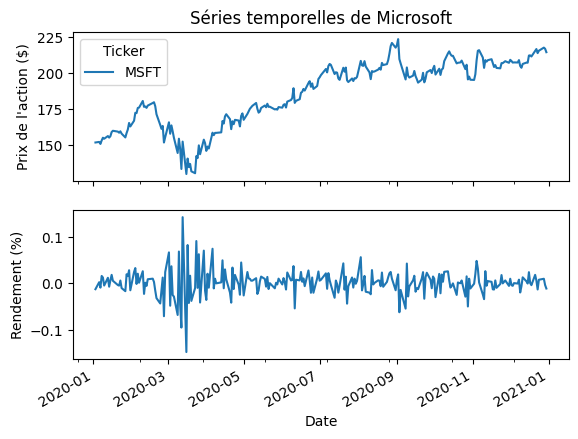

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)

df["Adj Close"].plot(ax=ax[0])
ax[0].set(title="Séries temporelles de Microsoft", ylabel="Prix de l'action ($)")

df["simple_rtn"].plot(ax=ax[1])
ax[1].set(ylabel="Rendement (%)")

plt.show()


##4. Modification du backend de Pandas pour utiliser Plotly


In [ ]:
df["Adj Close"].plot(title="MSFT stock in 2020", backend="plotly")


##5. Tracé saisonnier avec Seaborn


In [ ]:
!pip install fredapi
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
from datetime import datetime
import requests
fred = Fred(api_key="f4eacc505375b511a051af27a389b762")

# Télécharger les données de taux de chômage (série UNRATE)
data = fred.get_series('UNRATE', observation_start='2004-01-01', observation_end='2024-12-01')

# Convertir en DataFrame pour faciliter le traitement
df = pd.DataFrame(data, columns=['Unemployment Rate'])
df.index.name = 'Date'

# Afficher les 5 premières lignes
print(df.head())


            Unemployment Rate
Date                         
2004-01-01                5.7
2004-02-01                5.6
2004-03-01                5.8
2004-04-01                5.6
2004-05-01                5.6


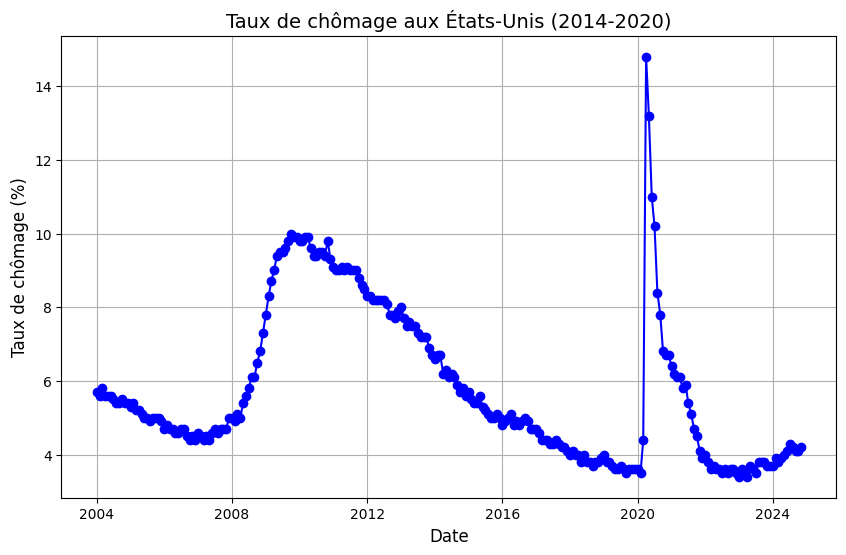

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Unemployment Rate'], marker='o', linestyle='-', color='blue')

# Ajouter des titres et labels
plt.title("Taux de chômage aux États-Unis (2014-2020)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Taux de chômage (%)", fontsize=12)

# Activer les grilles
plt.grid(True)

# Afficher le graphique
plt.show()

<ipython-input-9-86b403f1fe62>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



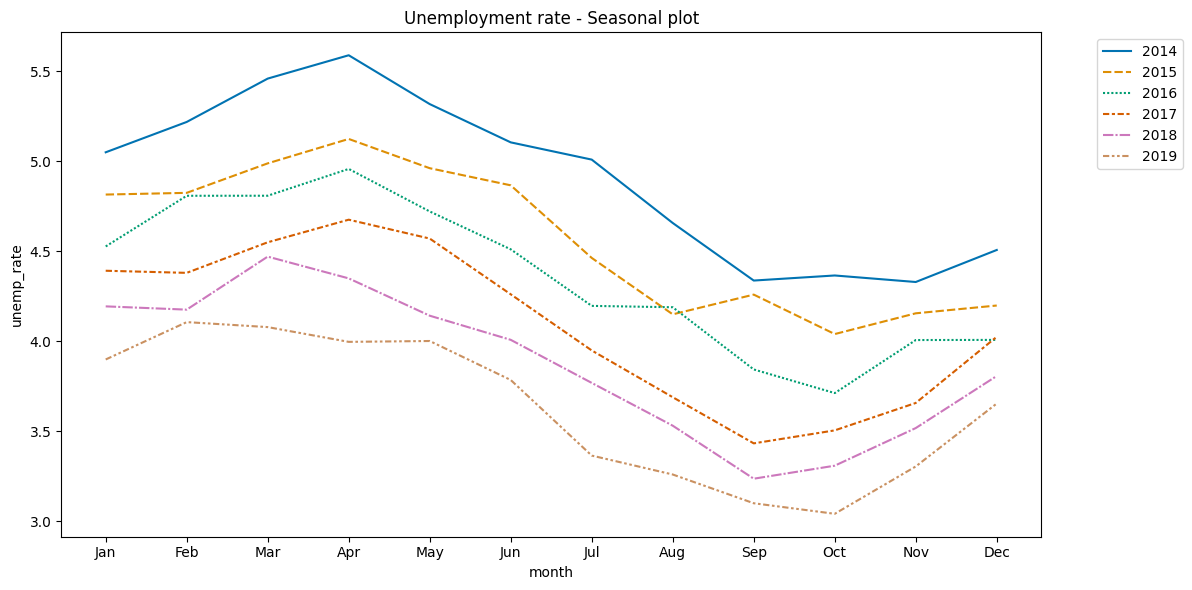

In [ ]:
# Créer des données synthétiques de chômage puisque nous n'avons pas d'accès API
dates = pd.date_range(start='2014-01-01', end='2019-12-31', freq='M')
np.random.seed(42)
base = 5.0
seasonal = 0.5 * np.sin(np.linspace(0, 12*np.pi, len(dates)))
trend = -np.linspace(0, 1.5, len(dates))
noise = np.random.normal(0, 0.1, len(dates))

unemployment = base + seasonal + trend + noise
df = pd.DataFrame({'unemp_rate': unemployment}, index=dates)

# Créer les colonnes year et month
df["year"] = df.index.year
df["month"] = df.index.strftime("%b")

# Créer le seasonal plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df,
            x="month",
            y="unemp_rate",
            hue="year",
            style="year",
            legend="full",
            palette="colorblind")
plt.title("Unemployment rate - Seasonal plot")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()

Text(0.5, 1.0, 'Unemployment rate - Month plot')

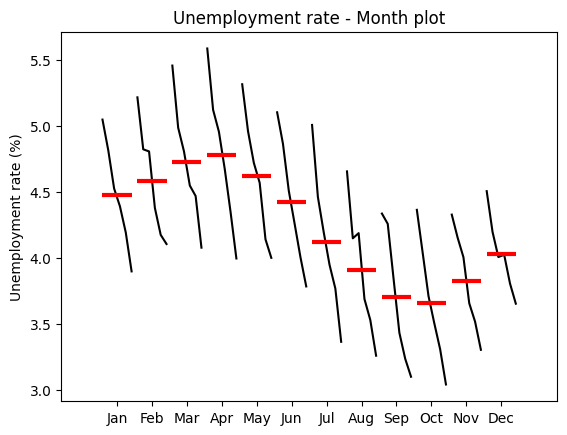

In [ ]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import plotly.express as px
month_plot(df["unemp_rate"], ylabel="Unemployment rate (%)")
plt.title("Unemployment rate - Month plot")

<ipython-input-11-04f026a118cf>:1: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



Text(0.5, 1.0, 'Unemployment rate - Quarter plot')

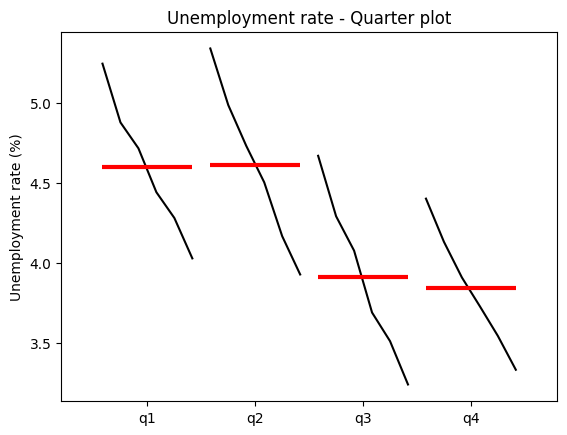

In [ ]:
quarter_plot(df["unemp_rate"].resample("Q").mean(),
             ylabel="Unemployment rate (%)")
plt.title("Unemployment rate - Quarter plot")

In [ ]:
fig = px.line_polar(
    df, r=df["unemp_rate"], theta="month",
    color="year", line_close=True,
    title="Unemployment rate - Polar seasonal plot",
    width=600, height=500,
    range_r=[3, 7]
 )
fig.show()

##Create interactive visualizations

In [ ]:
!pip install plotly
!pip install cufflinks
!pip install pandas_bokeh


In [ ]:
import pandas as pd
import yfinance as yf
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px


cf.go_offline()

# Configuration pour l'affichage des graphiques


# Téléchargement des données
df = yf.download("MSFT",
                 start="2020-01-01",
                 end="2020-12-31",
                 auto_adjust=False,
                 progress=False)
df["simple_rtn"] = df["Adj Close"].pct_change()
df = df.loc[:, ["Adj Close", "simple_rtn"]].dropna()
df = df.dropna()

In [ ]:
df[["Adj Close","simple_rtn"]].iplot(subplots=True, shape=(2,1),
         shared_xaxes=True,
         title="MSFT time series")

/usr/local/lib/python3.10/dist-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



In [ ]:
df = yf.download("MSFT",
                 start="2020-01-01",
                 end="2020-12-31",
                 auto_adjust=False,
                 progress=False)
df["simple_rtn"] = df["Adj Close"].pct_change()

df = df.loc[:, ["Adj Close", "simple_rtn"]].dropna()
df = df.dropna()